In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("/home/sid/Downloads/train.csv")
testdata=pd.read_csv("/home/sid/Downloads/test.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(data)

891

In [5]:
len(testdata)

418

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.shape

(891, 12)

In [8]:
data.shape[0]

891

In [9]:
data.shape[1]

12

In [10]:
del data["PassengerId"]
del testdata["PassengerId"]

In [11]:
categorical_variables=data.dtypes[data.dtypes=="object"].index.values

In [12]:
data[categorical_variables].apply(lambda x:len(x.unique()))

Name        891
Sex           2
Ticket      681
Cabin       148
Embarked      4
dtype: int64

In [13]:
## Cabin and Ticket are useless but information in the column Name can be exploited.

In [14]:
del data["Cabin"]
del testdata["Cabin"]

In [15]:
del data["Ticket"]
del testdata["Ticket"]

In [16]:
data.isnull().any()


Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [17]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.Embarked.fillna("DummyCategory", inplace=True)

In [19]:
testdata.isnull().any()

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [20]:
testdata.Age.fillna(data.Age.mean(),inplace=True)
testdata.Fare.fillna(data.Fare.mean(),inplace=True)

In [21]:
for i in range(891):
    x=data.ix[i,"Name"]
    fn=x.split(',')[1]
    sn=fn.split('.')[0]
    data.ix[i,"Name"]=sn

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [22]:
data.Name.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [23]:
## Using the Designation in the entry of the column name ;we can extract out better information from the column.

In [24]:
for i in range(418):
    x=testdata.ix[i,"Name"]
    fn=x.split(',')[1]
    sn=fn.split('.')[0]
    testdata.ix[i,"Name"]=sn

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0,0.5,u'Count')

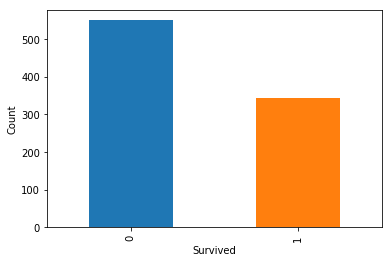

In [25]:
plt.figure()
pd.Series(data['Survived']).value_counts().plot(kind = 'bar')
plt.xlabel("Survived")
plt.ylabel("Count")

In [26]:
#Quite balanced dataset 

In [27]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0,0.5,u'Count')

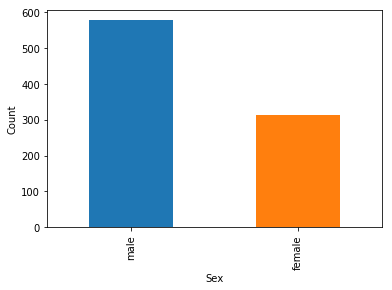

In [28]:
plt.figure()
pd.Series(data['Sex']).value_counts().plot(kind = 'bar')
plt.xlabel("Sex")
plt.ylabel("Count")

In [29]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0,0.5,u'Count')

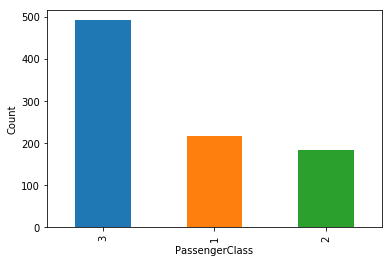

In [30]:
plt.figure()
pd.Series(data['Pclass']).value_counts().plot(kind = 'bar')
plt.xlabel("PassengerClass")
plt.ylabel("Count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57f99810d0>]],
      dtype=object)

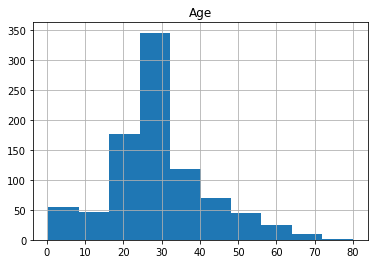

In [31]:
data.hist("Age")

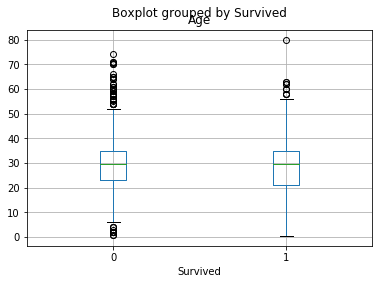

In [32]:
data.boxplot(column="Age",by="Survived")

In [33]:
#People who were either were very small(agewise) or very old were more likely to survive

In [34]:
data[data.Age<18]['Pclass'].value_counts()
#Considering people with age less than 18 to be children.

3    78
2    23
1    12
Name: Pclass, dtype: int64

Text(0.5,1,u'Number of children in various passenger classes')

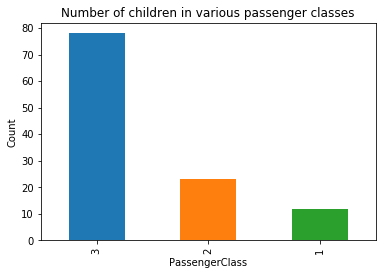

In [35]:
plt.figure()
pd.Series(data[data.Age<18]['Pclass']).value_counts().plot(kind = 'bar')
plt.xlabel("PassengerClass")
plt.ylabel("Count")
plt.title("Number of children in various passenger classes")

In [36]:
print "Classwise Survival Percentage :"
df = data.ix[:, ['Pclass', 'Survived']]
df1 = df.groupby("Pclass").agg({'Survived': 'sum'})
total = df.groupby("Pclass").count()
df1.div(total, level='Pclass') * 100

Classwise Survival Percentage :


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


Text(0,0.5,u'Count')

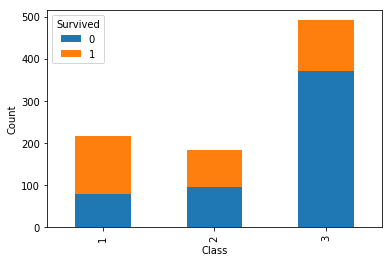

In [37]:
plt.figure()
crosstab=pd.crosstab(data['Pclass'],data.Survived)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Class")
plt.ylabel("Count")

In [38]:
#Passengers in 1st class have more chances of surviving as expected.

In [39]:
print "GenderWise Survival Percentage:"
df2 = data.ix[:, ['Sex', 'Survived']]
df3 = df2.groupby("Sex").agg({'Survived': 'sum'})
total1 = df2.groupby("Sex").count()
df3.div(total1, level='Sex') * 100

GenderWise Survival Percentage:


,Survived
Sex,
female,74.203822
male,18.890815


Text(0,0.5,u'Count')

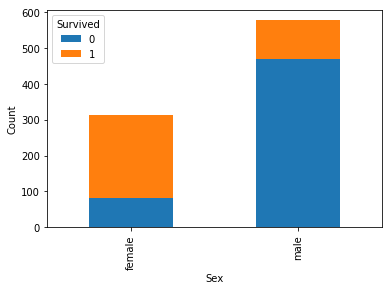

In [40]:
plt.figure()
crosstab=pd.crosstab(data['Sex'],data.Survived)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Sex")
plt.ylabel("Count")

In [41]:
#Female had  Very Higher chances to survive as compared to male.

In [42]:
a=(data.Age < 18).sum()
print "Number of passengers who are children(<18 years of age) : %d" %a

Number of passengers who are children(<18 years of age) : 113


Text(0,0.5,u'Count')

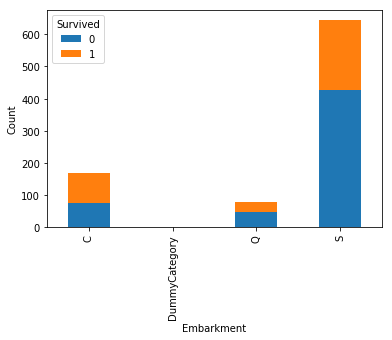

In [43]:
plt.figure()
crosstab=pd.crosstab(data['Embarked'],data.Survived)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Embarkment")
plt.ylabel("Count")

In [44]:
# DummyCategory is for the missing values in the column Embarkment.

In [45]:
data.groupby(["Pclass","Embarked"])["Fare"].mean()

Pclass  Embarked     
1       C                104.718529
        DummyCategory     80.000000
        Q                 90.000000
        S                 70.364862
2       C                 25.358335
        Q                 12.350000
        S                 20.327439
3       C                 11.214083
        Q                 11.183393
        S                 14.644083
Name: Fare, dtype: float64

In [46]:
#Cherbourg passengers are favoured for survival as expected since average Fare for passengers travelling cherbourg is very high.

In [47]:
b=0
c=0
for i in range(891):
    if data.ix[i,"SibSp"]==0 and data.ix[i,"Parch"]==0:
        b=b + 1
    else:
        c= c + 1 
print "Number of passengers who were alone are :%d and number of passengers who were with family are:%d" %(b,c)

Number of passengers who were alone are :537 and number of passengers who were with family are:354


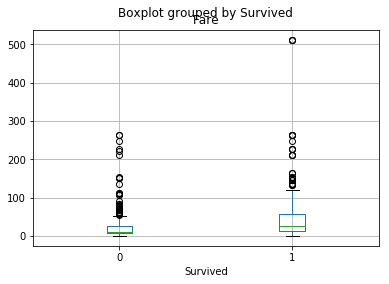

In [48]:
data.boxplot(column="Fare",by="Survived")

In [49]:
#people whose ticket fare is really high are more likely to survive.

Text(0,0.5,u'Count')

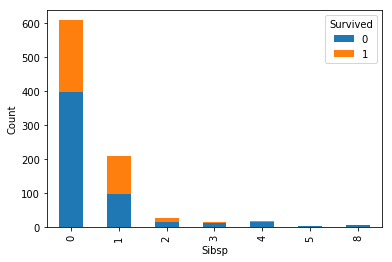

In [50]:
plt.figure()
crosstab=pd.crosstab(data['SibSp'],data.Survived)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Sibsp")
plt.ylabel("Count")


Text(0,0.5,u'Count')

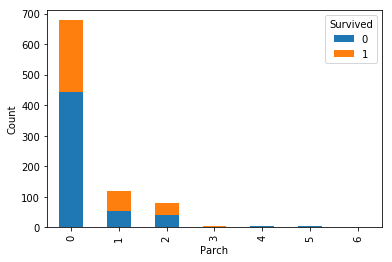

In [51]:
plt.figure()
crosstab=pd.crosstab(data['Parch'],data.Survived)
crosstab.plot(kind="bar",stacked=True)
plt.xlabel("Parch")
plt.ylabel("Count")

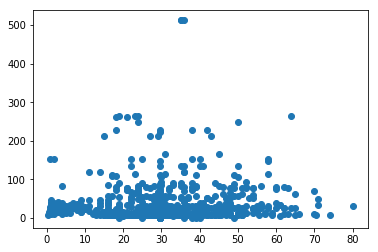

In [52]:
plt.scatter(data.Age,data.Fare)


In [53]:
# some outliers are present in the column FARE.

In [54]:
dependent_variable="Survived"

In [55]:
independent_variable=[x for x in data.columns if x not in [dependent_variable]]

In [56]:
independent_variable

['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
categorical_variable=data.dtypes[data.dtypes=="object"].index.values

In [61]:
for var in categorical_variable:
    data[var]=le.fit_transform(data[var])
    

In [62]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,11,1,22.0,1,0,7.2500,3
1,1,1,12,0,38.0,1,0,71.2833,0
2,1,3,8,0,26.0,0,0,7.9250,3
3,1,1,12,0,35.0,1,0,53.1000,3
4,0,3,11,1,35.0,0,0,8.0500,3


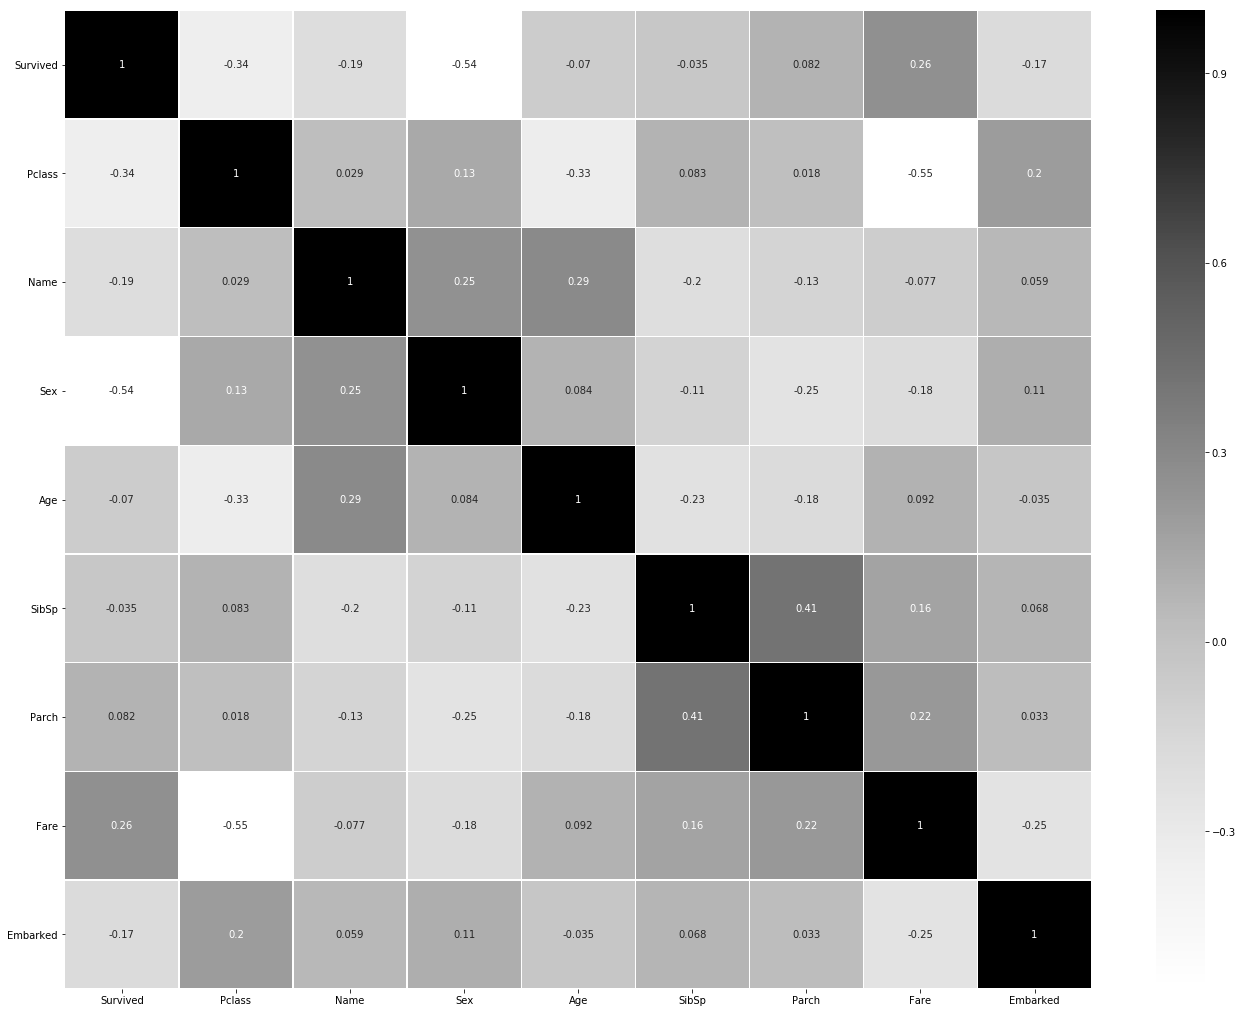

In [63]:
plt.figure(figsize=(23,18))
sns.heatmap(data.corr(),linewidths=.2,cmap="Greys", annot=True)
plt.yticks(rotation=0);

In [64]:
#Survival is highly dependent on SEX ,PassengerClass and FARE.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer

In [67]:
params=[{'max_depth':[3,4,5,6,7,8,9,10]}]

In [68]:
clf = GridSearchCV(DecisionTreeClassifier(),params, cv=5,
                       scoring=make_scorer(accuracy_score))

In [69]:
clf.fit(data[independent_variable], data[dependent_variable])

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [70]:
print(clf.best_params_)

{'max_depth': 6}


In [71]:
print(clf.grid_scores_)

[mean: 0.80696, std: 0.01143, params: {'max_depth': 3}, mean: 0.80359, std: 0.02765, params: {'max_depth': 4}, mean: 0.81369, std: 0.02669, params: {'max_depth': 5}, mean: 0.81818, std: 0.01997, params: {'max_depth': 6}, mean: 0.81257, std: 0.01712, params: {'max_depth': 7}, mean: 0.81145, std: 0.03057, params: {'max_depth': 8}, mean: 0.81145, std: 0.02538, params: {'max_depth': 9}, mean: 0.80471, std: 0.01891, params: {'max_depth': 10}]


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [72]:
categorical_variables=testdata.dtypes[testdata.dtypes=="object"].index.values

In [73]:
for var in categorical_variables:
    testdata[var]=le.fit_transform(testdata[var])

In [74]:
predictions=clf.predict(testdata)

In [75]:
print predictions

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [76]:
predictions=pd.DataFrame(predictions)

In [77]:
predictions.to_csv("predictions.csv")